In [2]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기

In [4]:
import pandas as pd

df = pd.read_csv(
    "../data/df2_0129.csv"
)

df

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55
1,https://www.linkedin.com/jobs/view/4265959832,2702- Data Engineer,EXL,"Pune, Maharashtra, India",2025-07-16,12:23:55
2,https://www.linkedin.com/jobs/view/4267652354,Data Engineer,SatSure,"Bangalore Urban, Karnataka, India",2025-07-16,12:23:55
3,https://www.linkedin.com/jobs/view/4267647369,DevOps/Cloud Engineer,BayOne Solutions,"Bengaluru, Karnataka, India",2025-07-16,12:23:55
4,https://www.linkedin.com/jobs/view/4265960423,AI Developer – Immediate Joiners Only,Perimattic,"Mumbai, Maharashtra, India",2025-07-16,12:23:55
...,...,...,...,...,...,...
2227,https://www.linkedin.com/jobs/view/4309720429,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2228,https://www.linkedin.com/jobs/view/4309719532,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2229,https://www.linkedin.com/jobs/view/4309701623,Data Scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2230,https://www.linkedin.com/jobs/view/4309703481,Senior AI Developer - Bangalore,SAP,"Bengaluru, Karnataka, India",2025-10-06,10:23:15


In [5]:
df.loc[df["url"]=="https://www.linkedin.com/jobs/view/4267655980",:]

,url,title,company,location,scrape_date,scrape_time
49,https://www.linkedin.com/jobs/view/4267655980,Senior DevOps Engineer,CG-VAK Software & Exports Ltd.,"Coimbatore, Tamil Nadu, India",2025-07-16,12:45:54


# 2. 데이터 전처리

## 1) 데이터 확인

In [6]:
df.shape

(2232, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2232 non-null   object
 1   title        2232 non-null   object
 2   company      2231 non-null   object
 3   location     1798 non-null   object
 4   scrape_date  2232 non-null   object
 5   scrape_time  2232 non-null   object
dtypes: object(6)
memory usage: 104.8+ KB


In [6]:
# Show all DataFrame columns
pd.set_option('display.max_columns', None)

In [7]:
df.head(1)

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55


## 2) 데이터 형변환

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2232 entries, 0 to 2231
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2232 non-null   object
 1   title        2232 non-null   object
 2   company      2231 non-null   object
 3   location     1798 non-null   object
 4   scrape_date  2232 non-null   object
 5   scrape_time  2232 non-null   object
dtypes: object(6)
memory usage: 104.8+ KB


In [9]:
df.head(1)

,url,title,company,location,scrape_date,scrape_time
0,https://in.indeed.com/viewjob?jk=8a6bb0507eba5bbf,Data Engineer/ETL Developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55


In [10]:
df["title"].unique()

array(['Data Engineer/ETL Developer', '2702- Data Engineer',
       'Data Engineer', 'DevOps/Cloud Engineer',
       'AI Developer – Immediate Joiners Only', 'GCP Cloud Engineer',
       'Big Data Engineer (5+ Years)', 'DevOps Engineer',
       'DevOps Consultant', 'Senior Data Engineer',
       'Senior DevOps Engineer – GCP', 'Machine Learning Engineer',
       'Data Engineer - Java, ETL', 'Azure Devops, API Mangement',
       'Machine Learning Engineer – 2', 'Data Engineer (MS-SQL Server)',
       'Machine Learning & AI Engineer', 'Data Engineer- Snowflake',
       '2638 - Snowflake Data Engineer', 'Sr Machine Learning Engineer',
       'AI Engineers', 'Senior Gen AI Engineer',
       'DevOps Engineer | Surveillance SRE | Senior Associate',
       'Staff Software Engineer I (Devops, Site Reliability Engineering)',
       'Data Engineer - Pyspark, AWS, AVP',
       'DevOps Engineer | Surveillance SRE | Manager',
       'Manager_AWS DevOps Engineer_Kubernetes, Helm Chart, ArgoCD, Terra

In [11]:
df["title"].nunique()

758

In [27]:
df_prep = df.drop(columns="url")

In [28]:
df_prep.isna().sum()

title            0
company          1
location       434
scrape_date      0
scrape_time      0
dtype: int64

In [33]:
df_prep["title"] = df["title"].str.lower()
df_prep

,title,company,location,scrape_date,scrape_time
0,data engineer/etl developer,Princeton IT America,"KA, IN",2025-07-16,12:23:55
1,2702- data engineer,EXL,"Pune, Maharashtra, India",2025-07-16,12:23:55
2,data engineer,SatSure,"Bangalore Urban, Karnataka, India",2025-07-16,12:23:55
3,devops/cloud engineer,BayOne Solutions,"Bengaluru, Karnataka, India",2025-07-16,12:23:55
4,ai developer – immediate joiners only,Perimattic,"Mumbai, Maharashtra, India",2025-07-16,12:23:55
...,...,...,...,...,...
2227,data scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2228,data scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2229,data scientist,People Prime Worldwide,"Hyderabad, Telangana, India",2025-10-06,10:23:15
2230,senior ai developer - bangalore,SAP,"Bengaluru, Karnataka, India",2025-10-06,10:23:15


In [12]:
import re

df = pd.read_csv(
    "./data/jobs_merged_wo_url_0129.csv",
    index_col=0
)

col = "title"


In [13]:
# 1) title에서 속성(레벨/근무형태/고용형태) 추출
SENIORITY_PATTERNS = {
    "intern": r"\b(intern|internship|trainee)\b",
    "junior": r"\b(junior|jr)\b",
    "senior": r"\b(senior|sr|staff|principal|lead|head|director|vp|vice president|manager)\b",
}

WORKMODE_PATTERNS = {
    "remote": r"\b(remote|wfh|work from home)\b",
    "hybrid": r"\b(hybrid)\b",
    "onsite": r"\b(onsite|on site|on-site)\b",
}

EMPLOYMENT_PATTERNS = {
    "contract": r"\b(contract|freelance|freelancer|part[- ]time|part time)\b",
    "full_time": r"\b(full[- ]time|full time)\b",
}

NOISE_PATTERNS = [
    r"\b(immediate joiners only|immediate joiner|immediate joining|joiners)\b",
    r"\b(only equity)\b",
    r"\b(ref#?\d+|r-\d+|t\d+-\d+)\b",  # REF#284462, R-17677, T500-19212 등
    r"\b(\d+\+?\s*years?\s*exp|\d+\+?\s*yoe)\b",  # 5+ years, 10+Years, 5+ YoE
]

In [14]:
# 2) 전처리 함수 정의
def extract_bracket_text(s: str) -> str:
    # ()와 [] 안의 텍스트를 모두 추출해서 ' | '로 연결
    if pd.isna(s):
        return ""
    s = str(s)
    parens = re.findall(r"\((.*?)\)", s)
    squares = re.findall(r"\[(.*?)\]", s)
    parts = [p.strip() for p in (parens + squares) if p.strip()]
    return " | ".join(parts)

def clean_title(s: str) -> str:
    if pd.isna(s):
        return ""
    s = str(s)

    s = s.replace("\u202f", " ")  # 유니코드 narrow no-break space 없애기
    s = s.replace("–", "-").replace("—", "-").replace("−", "-") # 대쉬로 맞추기

    s = s.replace("&amp;", "and")   # HTML 엔티티 흔한 것 처리
    
    s = s.lower().strip()           # 소문자, 스페이스 때어내기

    # 앞쪽에 붙는 ID/번호 패턴 제거: "2702- data engineer", "2638 - ..."
    s = re.sub(r"^\s*\d{2,6}\s*[-_:]\s*", "", s)

    # 괄호/대괄호 안 정보는 일단 제거 (기술스택/연차/장식이 많아서)
    # 필요하면 나중에 별도 컬럼으로 추출 가능
    s = re.sub(r"\(.*?\)", " ", s)
    s = re.sub(r"\[.*?\]", " ", s)

    # 구분자 통일: / | , _ -> 공백
    s = re.sub(r"[\/\|,_]+", " ", s)

    # 특수문자 정리(단어/공백/하이픈만 남김)
    s = re.sub(r"[^a-z0-9\s\-]+", " ", s)

    # 하이픈은 구분자로 취급(단, 단어 사이 연결은 띄어쓰기)
    s = re.sub(r"\s*-\s*", " ", s)

    # 공백 정리
    s = re.sub(r"\s+", " ", s).strip()

    return s

def extract_first_match(text: str, pattern_dict: dict) -> str:
    for label, pat in pattern_dict.items():
        if re.search(pat, text, flags=re.IGNORECASE):
            return label
    return "unknown"


def remove_noise(text: str) -> str:
    t = text
    for pat in NOISE_PATTERNS:
        t = re.sub(pat, " ", t, flags=re.IGNORECASE)
    t = re.sub(r"\s+", " ", t).strip()
    return t


# ---------- 괄호 안 텍스트 정제 + item 분해 ----------
def clean_paren_text(s: str) -> str:
    if not s:
        return ""
    s = s.replace("\u202f", " ")
    s = s.replace("&amp;", "and")
    s = s.replace("–", "-").replace("—", "-").replace("−", "-")
    s = s.lower().strip()

    # 급여/통화 제거(필요시 확장)
    s = re.sub(r"\$[\d,]+(\s*-\s*\$?[\d,]+)?", " ", s)

    # 괄호안은 쉼표/슬래시/플러스/&/and가 구분자 역할을 많이 함
    s = re.sub(r"[^a-z0-9\s\+\-\/,\.|&]+", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s



In [15]:
# 3) 직무 그룹 매핑 (EDA용)
ROLE_GROUP_RULES = [
    ("data_engineering", r"\b(data engineer|etl developer|data warehouse|data integration|databricks|snowflake)\b"),
    ("ml_ai", r"\b(machine learning|ml engineer|ai engineer|gen ai|generative ai|llm|nlp|computer vision|cv engineer|applied ai)\b"),
    ("devops_sre", r"\b(devops|sre|site reliability|platform engineer)\b"),
    ("cloud", r"\b(cloud engineer|gcp|aws|azure|oci|oracle cloud|cloud platform)\b"),
    ("data_science", r"\b(data scientist)\b"),
    ("analyst_bi", r"\b(data analyst|bi analyst|business intelligence|analytics)\b"),
    ("software_backend", r"\b(software engineer|developer|backend|full stack|sde)\b"),
]

def map_role_group(text: str) -> str:
    for group, pat in ROLE_GROUP_RULES:
        if re.search(pat, text, flags=re.IGNORECASE):
            return group
    return "other"


In [16]:
# 4) 실행: 전처리 컬럼 생성
df["title_raw"] = df[col].astype(str)

df["paren_raw"] = df["title_raw"].apply(extract_bracket_text)
df["title_clean"] = df["title_raw"].apply(clean_title)
df["title_clean"] = df["title_clean"].apply(remove_noise)

df["seniority"] = df[col].apply(lambda x: extract_first_match(x, SENIORITY_PATTERNS))
df["work_mode"] = df[col].apply(lambda x: extract_first_match(x, WORKMODE_PATTERNS))
df["employment_type"] = df[col].apply(lambda x: extract_first_match(x, EMPLOYMENT_PATTERNS))

df["role_group"] = df["title_clean"].apply(map_role_group)

# (선택) 토큰 리스트도 만들고 싶으면
#df_prep["title_tokens"] = df_prep["title_clean"].str.split()

# 결과 확인 (상위 몇 개만)
df[["title_clean", "role_group", "seniority", "work_mode", "employment_type", "paren_raw"]].head(50)

,title_clean,role_group,seniority,work_mode,employment_type,paren_raw
0,data engineer etl developer,data_engineering,unknown,unknown,unknown,
1,data engineer,data_engineering,unknown,unknown,unknown,
2,data engineer,data_engineering,unknown,unknown,unknown,
3,devops cloud engineer,devops_sre,unknown,unknown,unknown,
4,ai developer,software_backend,unknown,unknown,unknown,
5,gcp cloud engineer,cloud,unknown,unknown,unknown,
6,big data engineer,data_engineering,unknown,unknown,unknown,5+ Years
7,data engineer etl developer,data_engineering,unknown,unknown,unknown,
8,devops engineer,devops_sre,unknown,unknown,unknown,
9,data engineer,data_engineering,unknown,unknown,unknown,


In [17]:
df.loc[df["work_mode"].str.contains("remote"),:].loc[df["paren_raw"].str.contains("Remote")]["paren_raw"].value_counts()

paren_raw
Remote                                         35
Remote I Immediate Joiners                      4
Remote - India                                  3
Time-series forecasting and/or M&V | Remote     2
Part-Time | Remote | $80 –$120/hr               2
Remote, Full-Time                               1
Name: count, dtype: int64

In [18]:
df["work_mode"].value_counts()

work_mode
unknown    1986
remote      234
hybrid        7
onsite        5
Name: count, dtype: int64

In [17]:
df.loc[df["work_mode"].str.contains("unknown"),:].value_counts()

title                                 company                    location                       scrape_date  scrape_time  title_raw                             paren_raw  title_clean                           seniority  work_mode  employment_type  role_group      
Python AI Engineer - 17852            Turing                     Bengaluru, Karnataka, India    2025-09-22   16:27:02     Python AI Engineer - 17852                       python ai engineer 17852              unknown    unknown    unknown          ml_ai               5
                                                                                                2025-09-24   17:18:17     Python AI Engineer - 17852                       python ai engineer 17852              unknown    unknown    unknown          ml_ai               5
                                                                 Hyderabad, Telangana, India    2025-09-22   15:41:21     Python AI Engineer - 17852                       python ai engineer 17852

In [9]:
df.loc[df["paren_raw"].str.contains("Remote"),:]["paren_raw"].value_counts()

paren_raw
Remote                                         35
Remote I Immediate Joiners                      4
Remote - India                                  3
Time-series forecasting and/or M&V | Remote     2
Part-Time | Remote | $80 –$120/hr               2
Remote, Full-Time                               1
Name: count, dtype: int64

In [53]:
df["role_group"].value_counts().head(20)

role_group
ml_ai               1144
data_engineering     297
devops_sre           216
data_science         215
analyst_bi           156
software_backend      89
other                 61
cloud                 54
Name: count, dtype: int64

In [ ]:

# 저장
#df.to_csv("jobs_with_title_features.csv", index=False)


## 3) 데이터 결측치 확인 및 처리

In [76]:
nan_count_by_year = (
    df_test[df_test["ai_keywords"].notna()]
    .groupby("posting_year")
    .size()
)
nan_count_by_year

posting_year
2010     34
2011     29
2012     24
2013     31
2014     59
2015     53
2016     42
2017     53
2018    105
2019    116
2020    114
2021    128
2022    193
2023    203
2024    214
2025    225
dtype: int64

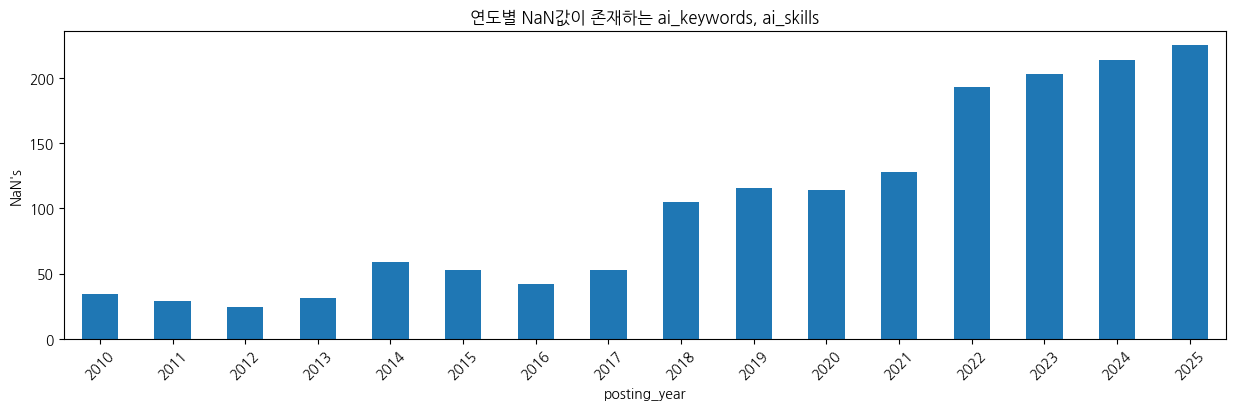

In [97]:
plt.figure(figsize=(15,4))
nan_count_by_year.plot(kind='bar')
plt.title("연도별 NaN값이 존재하는 ai_keywords, ai_skills")
plt.ylabel("NaN's")
plt.xticks(rotation=45)
plt.show()

In [98]:
# 연도별 AI 언급 비율 시각화
df_test["ai_mentioned"] = df_test["ai_keywords"].notna()
df_test.head(1)

,posting_year,ai_keywords,ai_skills,industry_ai_adoption_stage,ai_mentioned
3573,2010,NaN,NaN,Emerging,False


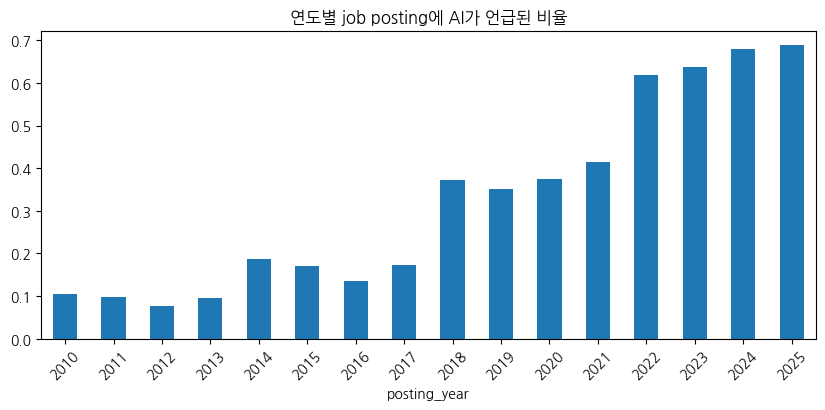

In [115]:
ai_mentioned_by_year = df_test.groupby("posting_year")["ai_mentioned"].mean()

plt.figure(figsize=(10,4))
ai_mentioned_by_year.plot(kind='bar')
plt.title("연도별 job posting에 AI가 언급된 비율")
plt.xticks(rotation=45)
plt.show()

## 4) 데이터 이상치 확인 및 처리

<Axes: ylabel='salary_usd'>

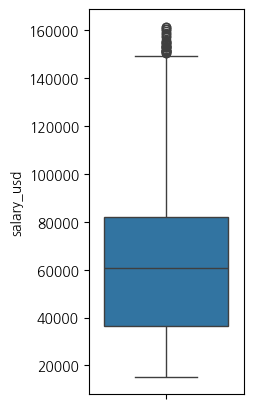

In [109]:
plt.figure(figsize=(2,5))
sns.boxplot(df["salary_usd"])

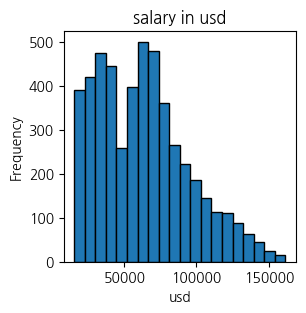

In [114]:
plt.figure(figsize=(3,3))
df["salary_usd"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("salary in usd")
plt.xlabel("usd")
plt.show()

## 5) 파생변수 생성하기

In [118]:
df.head(5)

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


# 3. 데이터 탐색

## 1) 변수별 특징 파악

## 2) 그룹별 특징 파악

## 3) 변수간 관계 파악